## Load Data

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
df = pd.read_excel('SR.xlsx',sheet_name= 2)

In [119]:
type(df)
df.head()

,State,Under 18,Victims
0,Alabama,1107108,9903
1,Alaska,192428,7950
2,Arizona,1476856,5114
3,Arkansas,677522,7302
4,California,9452391,132181


In [120]:
df.isna().sum()

State       0
Under 18    0
Victims     0
dtype: int64

In [121]:
df.describe()

,Under 18,Victims
count,5.100000e+01,51.000000
mean,1.450870e+06,17741.803922
std,1.665660e+06,27003.216531
min,1.121280e+05,692.000000
25%,4.142820e+05,3982.000000
50%,9.791630e+05,8494.000000
75%,1.554108e+06,14782.000000
max,9.452391e+06,132181.000000


## Exploratory Data Analysis

In [122]:
df.corr()

,Under 18,Victims
Under 18,1.00000,0.85576
Victims,0.85576,1.00000


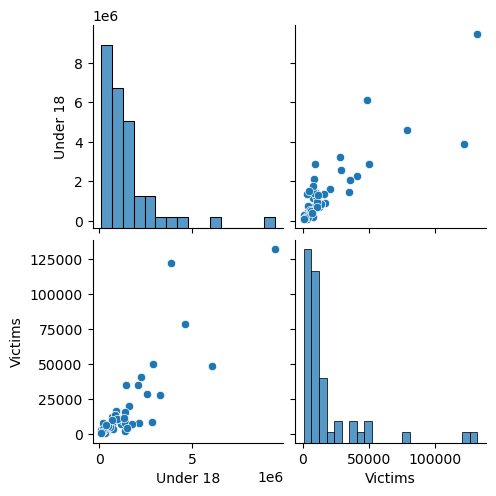

In [123]:
sns.pairplot(df)

## Split data

In [124]:
X = df.drop(['Victims','State'],axis=1)
y = df['Victims']

In [125]:
X

,Under 18
0,1107108
1,192428
2,1476856
3,677522
4,9452391
5,1151118
6,872853
7,189698
8,112128
9,3882271


In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modeling

In [127]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#### Intercept and Beta coefficient

In [128]:
print(model.intercept_)
print(model.coef_)

-6055.548940631916
[0.01899948]


## Predictions

In [129]:
test_pred = model.predict(X_test)
test_pred

array([109885.28018695,  12548.03862695,  27752.2772808 ,    982.59932983,
         8398.24826297,   3453.80465943,  11644.13837895,  81593.81990779,
         6817.01656272,  34363.77323452,  55778.69481777,  -3925.17527784,
        19366.97090032,  10528.20393721,  22697.50369848, 173534.96223219])

## Evaluation

In [130]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [131]:
print("MAE: ",mean_absolute_error(test_pred,y_test))
print("MSE: ",mean_squared_error(test_pred,y_test))
print("RSME: ",np.sqrt(mean_absolute_error(test_pred,y_test)))
print("R_score: ",r2_score(test_pred,y_test))
print("model score: ",model.score(X_test,y_test))

MAE:  14363.87384740228
MSE:  487811968.8580693
RSME:  119.84937983737036
R_score:  0.7747750185209081
model score:  0.5822876105188521


## Checking for Assumptions

## Linearity of error

In [132]:
res = y_test - test_pred
res

43   -61077.280187
40    -1810.038627
46   -20181.277281
12      964.400670
24    -4395.248263
31     2819.195341
17     5300.861621
32    -2544.819908
3       484.983437
30   -26260.773235
13   -27618.694818
8      6957.175278
49    -7738.970900
6      2289.796063
47   -18024.503698
4    -41353.962232
Name: Victims, dtype: float64

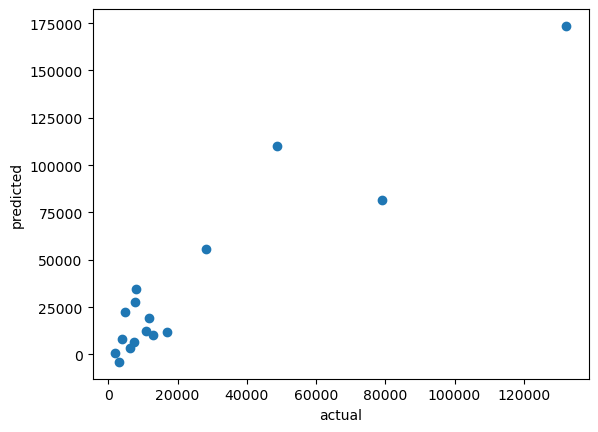

In [133]:
plt.scatter(y_test,test_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

## Normality of error

<function matplotlib.pyplot.show(close=None, block=None)>

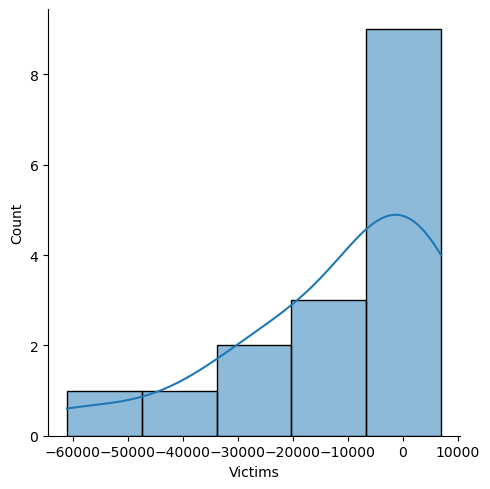

In [134]:
sns.displot(res,kde=True)
plt.show

## Equality of varience

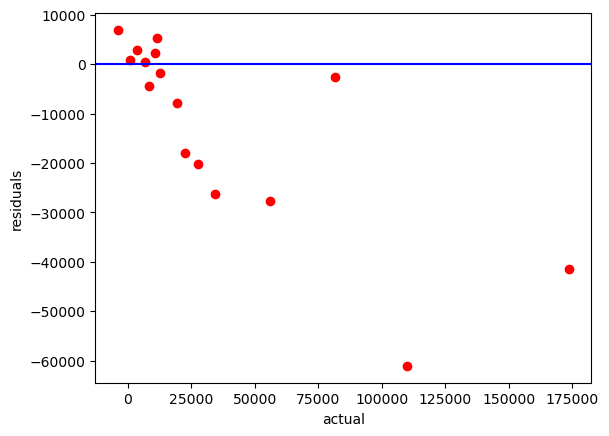

In [135]:
plt.scatter(test_pred,res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel('actual')
plt.ylabel('residuals')
plt.show()

## varibles significance

In [136]:
import statsmodels.api as smf

model2 = smf.OLS(y, X)
results = model2.fit()

# Access the summary information
summary = results.summary()

# Print the summary
print(summary)

                                 OLS Regression Results                                
Dep. Variable:                Victims   R-squared (uncentered):                   0.811
Model:                            OLS   Adj. R-squared (uncentered):              0.807
Method:                 Least Squares   F-statistic:                              214.6
Date:                Sat, 20 May 2023   Prob (F-statistic):                    1.01e-19
Time:                        07:08:04   Log-Likelihood:                         -559.07
No. Observations:                  51   AIC:                                      1120.
Df Residuals:                      50   BIC:                                      1122.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Predictions

In [139]:
model.predict([[1234450]])

c:\Users\mukes\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17398.35880792])